In [28]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.insert(0, '../')

from TextLabeller import *
from plotting import *

%matplotlib inline

In [29]:
from plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [30]:
def classify(x, y, train_test_ratio):

    x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = train_test_ratio)

    print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
    print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
    print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

    # Initialize classifier
    rfc = RandomForestClassifier()
#     from sklearn.naive_bayes import GaussianNB
#     rfc = GaussianNB()

    # Train classifier
    model = rfc.fit(x_train, train_labels)

    # Make predictions
    y_preds = rfc.predict(test)

    # Evaluate model
    print(classification_report(test_labels, y_preds))
    print(accuracy_score(test_labels, y_preds))
    print(confusion_matrix(test_labels, y_preds))
    
    return test_labels, y_preds


# ROC Curve
def plot_roc_curve(test_labels, y_preds):
    fpr, tpr, threshold = roc_curve(test_labels, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

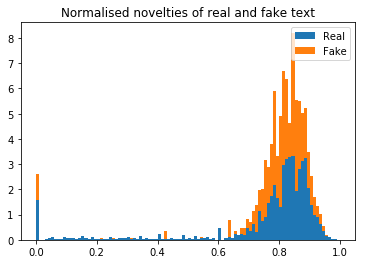

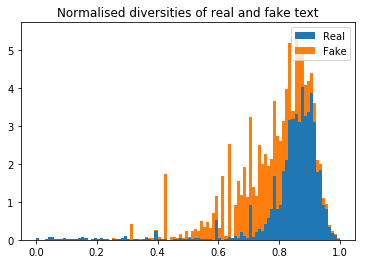

In [31]:
def normalize(distances):
    """
    """
    min_val, max_val = min(distances), max(distances)
    return [(val - 0) / (max_val - 0) for val in distances]

from utils import read_list, normal_distribution, get_scatter_plot, inverse_distances, normed_dists_to_sims

# Initial jaccard similarities
jac_real_diversities = read_list('jaccard_diversities_real.txt')
jac_real_novelties = read_list('jaccard_novelties_real.txt')
jac_fake_diversities = read_list('jaccard_diversities_fake3.txt')
jac_fake_novelties = read_list('jaccard_novelties_fake3.txt')

# Transform distances to similarities
jac_real_diversities = normalize(jac_real_diversities)
jac_real_novelties = normalize(jac_real_novelties)
jac_fake_diversities = normalize(jac_fake_diversities)
jac_fake_novelties = normalize(jac_fake_novelties)

def stacked_hist(data, name):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(name)
    plt.show()
    
def _stacked_hist(data):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
#     plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

# Novelties of real and fake text using jaccard similarity metric
jac_novs = combine_real_fake(jac_real_novelties, jac_fake_novelties)
stacked_hist(jac_novs, "Normalised novelties of real and fake text")

# Diversities of real and fake text using jaccard similarity metric
jac_divs = combine_real_fake(jac_real_diversities, jac_fake_diversities)
stacked_hist(jac_divs, "Normalised diversities of real and fake text")

(10256, 5)
[1 1 1 ... 0 0 0]


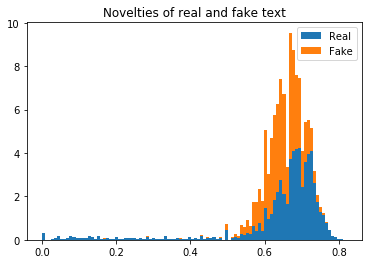

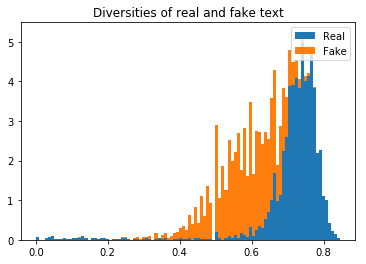

In [33]:
METRIC = "jaccard"

labelled_real=f'{METRIC}_labelled_real_text.csv'
labelled_fake=f'{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]


print(fake_data.shape)

# fake_data = fake_data[len(real_data['text'].split()) >= 20]

combined_data = real_data.append(fake_data)

y = combined_data['label'].values
print(y)

csvjac_novs = combine_real_fake(real_data['novelty'], fake_data['novelty'])
stacked_hist(csvjac_novs, "Novelties of real and fake text")


csvjac_divs = combine_real_fake(real_data['diversity'], fake_data['diversity'])
stacked_hist(csvjac_divs, "Diversities of real and fake text")

## Classify using both novelty and diversity

input dimensions: 20670 | output dimensions: 20670
x_train dimensions: 18603 | y_train dimensions: 18603
x_test dimensions: 2067 | y_test dimensions: 2067
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1046
           1       0.92      0.92      0.92      1021

   micro avg       0.92      0.92      0.92      2067
   macro avg       0.92      0.92      0.92      2067
weighted avg       0.92      0.92      0.92      2067

0.9196903725205612
[[964  82]
 [ 84 937]]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


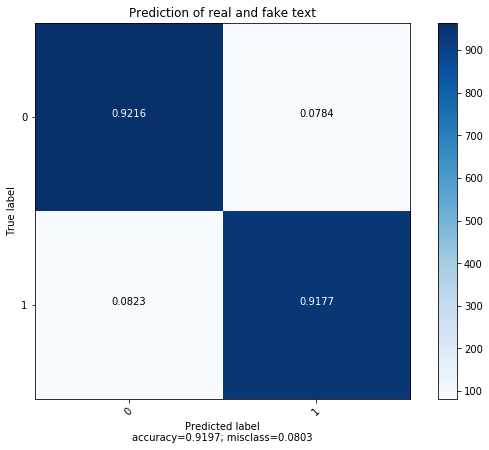

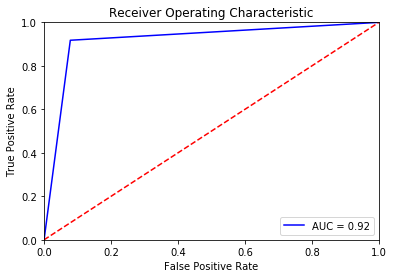

In [6]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

novs_divs_x = list()
for ix, nov in enumerate(novs):
    novs_divs_x.append([nov, divs[ix]])

test_labels, y_preds = classify(novs_divs_x, y, 0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

In [7]:
# novs = combined_data['novelty'].values
# divs = combined_data['diversity'].values

# x = list()
# for ix, nov in enumerate(novs):
#     x.append([nov, divs[ix]])

# test_labels, y_preds = classify(x, y, 0.1)

# cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
# results = y
# fprs, tprs, scores = [], [], []
    
# for (train, test), i in zip(cv.split(x, y), range(5)):
#     clf.fit(X.iloc[train], y.iloc[train])
#     _, _, auc_score_train = compute_roc_auc(train)
#     fpr, tpr, auc_score = compute_roc_auc(test)
#     scores.append((auc_score_train, auc_score))
#     fprs.append(fpr)
#     tprs.append(tpr)

# plot_roc_curve(fprs, tprs);
# pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

## Classify using only novelty

input dimensions: 20670 | output dimensions: 20670
x_train dimensions: 18603 | y_train dimensions: 18603
x_test dimensions: 2067 | y_test dimensions: 2067
              precision    recall  f1-score   support

           0       0.64      0.76      0.69       993
           1       0.73      0.61      0.66      1074

   micro avg       0.68      0.68      0.68      2067
   macro avg       0.69      0.68      0.68      2067
weighted avg       0.69      0.68      0.68      2067

0.6802128688921142
[[750 243]
 [418 656]]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


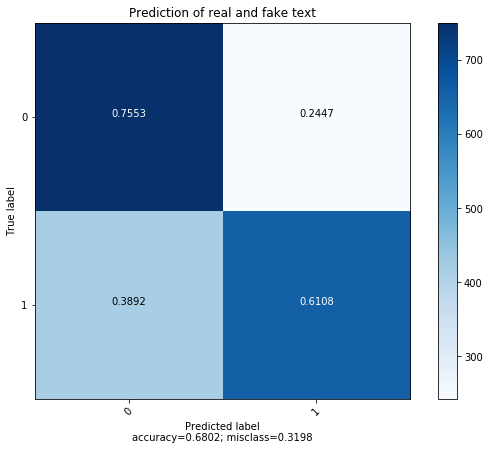

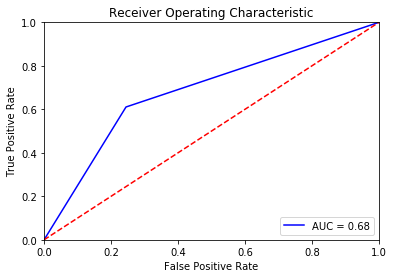

In [8]:
novs = combined_data['novelty'].values

novs_x = list()
for ix, nov in enumerate(novs):
    novs_x.append([nov])

test_labels, y_preds = classify(novs_x, y, 0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

## Classify using only diversity

input dimensions: 20670 | output dimensions: 20670
x_train dimensions: 18603 | y_train dimensions: 18603
x_test dimensions: 2067 | y_test dimensions: 2067
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1039
           1       0.90      0.86      0.88      1028

   micro avg       0.88      0.88      0.88      2067
   macro avg       0.88      0.88      0.88      2067
weighted avg       0.88      0.88      0.88      2067

0.8829221093372037
[[936 103]
 [139 889]]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


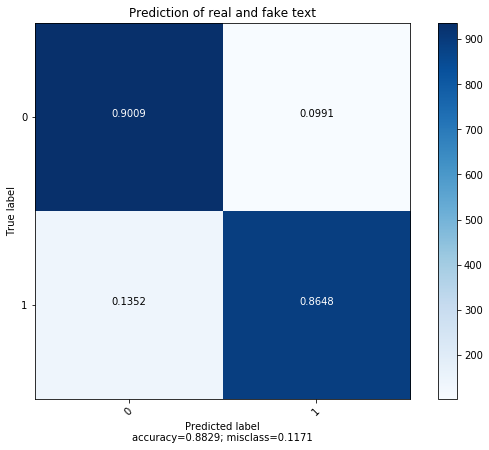

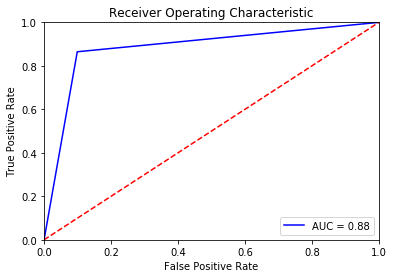

In [9]:
divs = combined_data['diversity'].values

divs_x = list()
for ix, div in enumerate(divs):
    divs_x.append([div])

test_labels, y_preds = classify(divs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

In [10]:
from sklearn import model_selection

def crwac(y_true, y_pred):
    print(classification_report(y_true, y_pred))

seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring='accuracy'
cv_results = model_selection.cross_val_score(RandomForestClassifier(), divs_x, y, cv=kfold, scoring=scoring)
print(cv_results.mean())

/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/

0.8660861151427188


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[0.631578947368421], [0.6774193548387097], [0.6363636363636364], [0.5882352941176471], [0.7083333333333333], [0.59375], [0.7575757575757576], [0.5666666666666667], [0.6923076923076923], [0.040000000000000036]] [0 0 0 1 1 0 1 1 1 1]
[0.13444346 0.6615992  0.09646512 ... 0.55045619 0.50757027 0.33778921]
[[0.5142857142857142], [0.7666666666666666], [0.4615384615384616], [0.625], [0.75], [0.6153846153846154], [0.7058823529411764], [0.7567567567567568], [0.8], [0.5185185185185186]] [0 1 0 0 1 0 1 1 1 0]
[0.35143506 0.0530435  0.88425856 ... 0.16074811 0.07111409 0.96039759]
[[0.7254901960784313, 0.7560975609756098], [0.6896551724137931, 0.5862068965517242], [0.6756756756756757, 0.7631578947368421], [0.7560975609756098, 0.7948717948717949], [0.7, 0.7894736842105263], [0.6388888888888888, 0.65625], [0.5357142857142857, 0.6451612903225806], [0.6875, 0.7428571428571429], [0.6470588235294117, 0.7179487179487181], [0.6774193548387097, 0.696969696969697]] [1 0 1 1 1 0 1 1 1 0]
[0. 1. 0. ... 0. 0

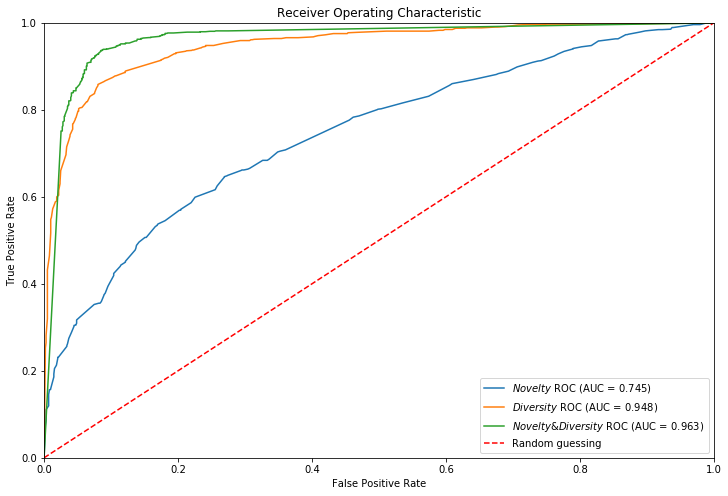

In [11]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

models =[ RandomForestClassifier(), GaussianNB()]

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': '$Novelty$',
    'model': None,
    'metric': novs_x
},
{
    'label': '$Diversity$',
    'model': None,
    'metric': divs_x
},
    {
    'label': '$Novelty & Diversity$',
    'model': None,
    'metric': novs_divs_x
},
]

# print(metrics[0])

# Below for loop iterates through your models list
for m in metrics:
    model = models[0] # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    print(x_train[:10], y_train[:10])
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data
    
    print(y_preds)

    fpr, tpr, _ = roc_curve(y_test, y_preds)
#     print(fpr, tpr)
    roc_auc = auc(fpr, tpr)
#     print(roc_auc)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (m['label'], roc_auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()   # Display



In [12]:
# f, (ax1, ax2) = plt.subplots(1, 2)


# for m in metrics:
#     model = models[0] # select the model
#     x = m['metric']
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
#     print(x_train[:10], y_train[:10])
#     model.fit(x_train, y_train) # train the model
#     y_preds=model.predict_proba(x_test)[:,1] # predict the test data
    
#     print(y_preds)

#     fpr, tpr, _ = roc_curve(y_test, y_preds)
# #     print(fpr, tpr)
#     roc_auc = auc(fpr, tpr)
# #     print(roc_auc)
#     plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (m['label'], roc_auc))

# ax1.hist(list(filter(lambda x : x >= 0, words_lens3)), bins=None )
# # ax1.set_title('Real Text Corpus')
# ax2.hist(list(filter(lambda x : x >= 20, words_lens3)), bins=None  )
# # ax2.set_title('Processed Real Text Corpus')
# ax2.set_xlim(0,55)
# ax1.set_xlim(0,55)
# ax1.set_title('Original Synthetic Text Set')
# # axarr[1, 1].hist(list(filter(lambda x : x >= 20, words_lens3*1)), bins=None  )
# ax2.set_title('Filtered Synthetic Text Set')
# for ax in (ax1, ax2):
#     ax.set(ylabel='Number of sentences', xlabel='Number of words')
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in (ax1, ax2):
#     ax.label_outer()
    
# f.set_figheight(6)
# f.set_figwidth(15)

/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


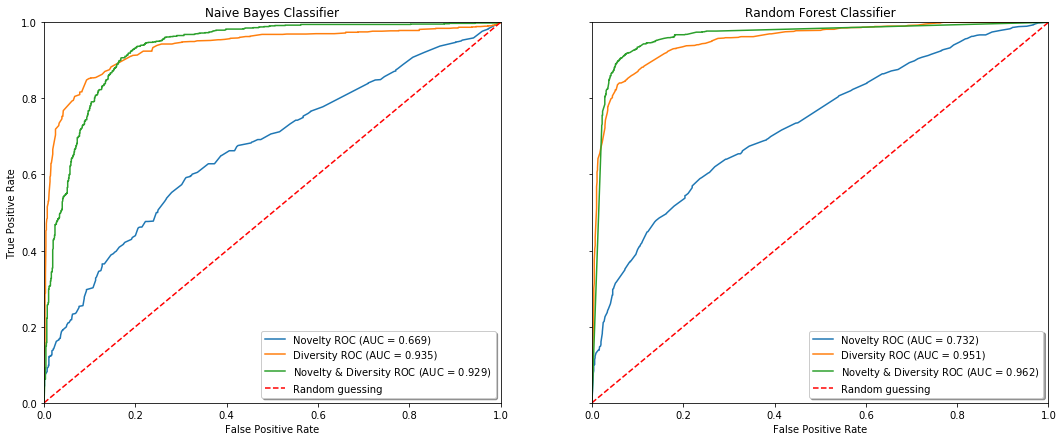

In [13]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': model,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': model,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': model,
    'metric': novs_divs_x
},
]


# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display



mean acc: 0.6069182389937108 +- 0.017700135908982718
mean acc: 0.8452668924367037 +- 0.00597007472033934
mean acc: 0.8488953394613773 +- 0.005465240468723414


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.6779551685212063 +- 0.006562367111666901


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.8840509595226576 +- 0.00351387733650068


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.9175133043057571 +- 0.0018013791806837864


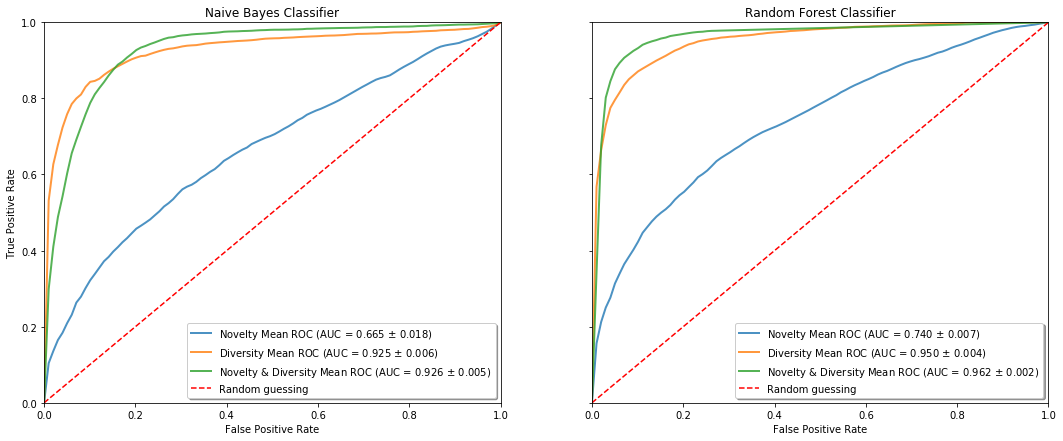

In [14]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': None,
    'metric': novs_divs_x
},
]

seed=7

# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6, random_state=seed)

    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)
        
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)

    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)

#     std_tpr = np.std(tprs, axis=0)
#     tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#     tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#     plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                      label=r'$\pm$ 1 std. dev.')
    
    
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
#     model.fit(x_train, y_train) # train the model
#     y_preds=model.predict_proba(x_test)[:,1] # predict the test data

#     fpr, tpr, _ = roc_curve(y_test, y_preds)
#     roc_auc = auc(fpr, tpr)
#     ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6)

    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)


    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax2.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display


In [15]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

np.random.seed(0)

In [16]:
X, y = np.array(novs_divs_x), np.array(combined_data['label'].values)

# iris = datasets.load_iris()
# X = iris.data[:, 2]


# Loading some example data
# iris = datasets.load_iris()
# X = iris.data[:, 2]
# X = X[:, None]
# y = iris.target
print(X.shape)
print(y.shape)
    
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

(20670, 2)
(20670,)


Accuracy: 0.902 (+/- 0.003) [KNN]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.917 (+/- 0.002) [Random Forest]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.850 (+/- 0.001) [Naive Bayes]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.914 (+/- 0.004) [Stacking Classifier]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


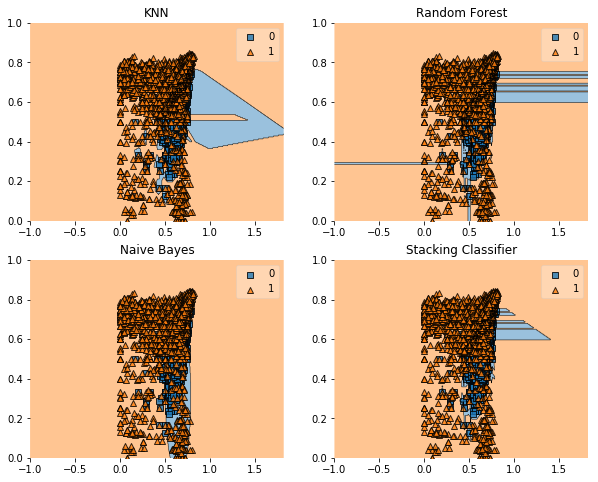

In [17]:

label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy: %.3f (+/- %.3f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

plt.show()

In [18]:
# Initializing Classifiers
clf1 = LogisticRegression(random_state=1, solver='lbfgs')
clf2 = RandomForestClassifier(n_estimators=100, 
                              random_state=1)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier()

xx, yy = np.meshgrid(np.linspace(0, 1, 50),
                     np.linspace(0, 1, 50))
rng = np.random.RandomState(0)
X = np.array(novs_divs_x)
y = np.array(combined_data['label'].values)

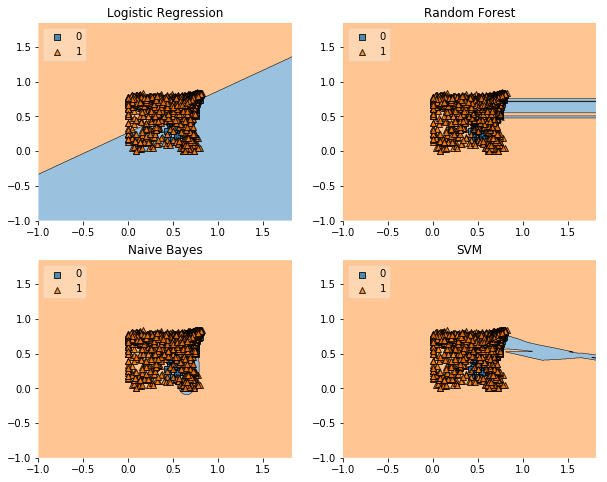

In [19]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

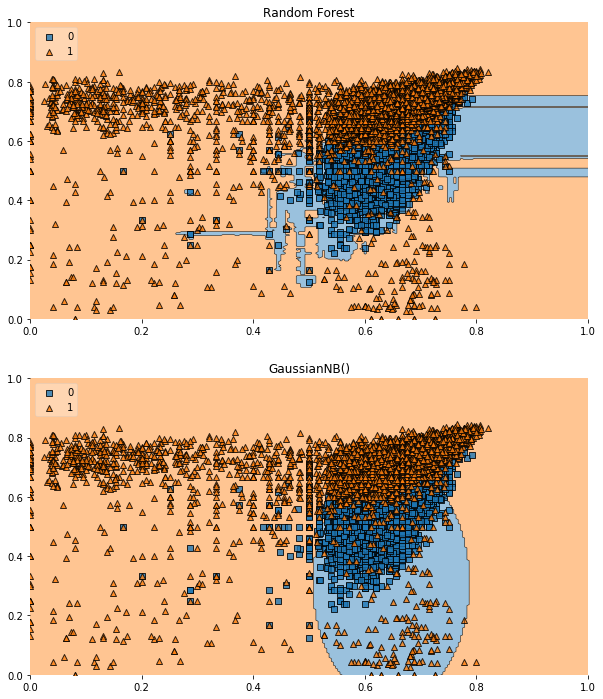

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
# clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0, n_estimators=100)
clf3 = GaussianNB()
# eclf = GaussianNB()

# Loading some example data
X = np.array(novs_divs_x)
y = np.array(combined_data['label'].values)

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 1)
fig = plt.figure(figsize=(10, 12))

labels = [
          'Random Forest',
          'GaussianNB()'
          ]

for clf, lab, grd in zip([clf2, clf3],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[ grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(lab)

plt.show()